In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # library to handle requests

!pip install beautifulsoup4
from bs4 import BeautifulSoup

!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [3]:
# get the file containing the list of postal districts of Dublin from wikipedia:
# https://en.wikipedia.org/wiki/List_of_Dublin_postal_districts

source_file = requests.get('https://en.wikipedia.org/wiki/List_of_Dublin_postal_districts').text
print('Got the file from wikipedia')

Got the file from wikipedia


In [4]:
#get the data parsed and scraped:

my_soup = BeautifulSoup(source_file, 'html5lib')
print('Data scraped to my_soup using BeautifulSoup scraper and html5lib parser')

Data scraped to my_soup using BeautifulSoup scraper and html5lib parser


In [5]:
# the following (uncommented) code printed the "prettified" html file:

# print(my_soup.prettify())

In [6]:
# the following (uncommented) code printed the table from the html file:

# the_table = my_soup.table
# print(the_table)

In [7]:
# the following (uncommented) code printed only the text in the table:

# the_text_in_the_table = my_soup.table.text
# print(the_text_in_the_table)

In [8]:
# instantiate the dataframe containing the districts of Dublin

column_names = ['Postal code', 'District', 'Description']
dublin_districts = pd.DataFrame(columns=column_names)
dublin_districts

,Postal code,District,Description


In [9]:
#get data from the table in my_soup file which contains the parsed and scraped data

match_data = my_soup.table.find_all('td') 
match_data_length = len(match_data)
for i in range(0, match_data_length):
    try:
        match_1 = match_data[i].text.split('(')
        district = match_1[0]
        match_2 = match_1[1].split(')')
        postal_code = match_2[0]
        description = match_2[1].split('\n')[0]
        dublin_districts = dublin_districts.append({'Postal code': postal_code,
                                                              'District': district, 
                                                              'Description': description}, 
                                                              ignore_index=True)
    except:
        pass
    
dublin_districts

,Postal code,District,Description
0,D1,Dublin 1,Dublin
1,D2,Dublin 2,Dublin
2,D3,Dublin 3,Dublin
3,D4,Dublin 4,"Dublin, Dun Laoghaire Rathdown"
4,D5,Dublin 5,Dublin
5,D6,Dublin 6,"Dublin, Dún Laoghaire Rathdown"
6,D7,Dublin 7,Dublin
7,D6W,Dublin 6W,"Dublin, South Dublin"
8,D9,Dublin 9,Dublin
9,D8,Dublin 8,Dublin


In [10]:
# Use the Nominatim geocoder from the geopy library to get the latitude and longitude values 
# for districts in Dublin. Define a user_agent: dublin_explorer.
# add the latitude and longitude values to the dublin_districts dataframe

latitudines = []
longitudines = []
geolocator = Nominatim(user_agent="dublin_explorer")

for i in range(0, dublin_districts.shape[0]):
    address = dublin_districts['Postal code'][i] + ', Dublin, Irland'
    location = geolocator.geocode(address)
    latitudines.append(location.latitude)
    longitudines.append(location.longitude)

dublin_districts['Latitude'] = latitudines
dublin_districts['Longitude'] = longitudines

dublin_districts.head()

,Postal code,District,Description,Latitude,Longitude
0,D1,Dublin 1,Dublin,54.654106,-6.234020
1,D2,Dublin 2,Dublin,54.656109,-6.231326
2,D3,Dublin 3,Dublin,52.653599,-7.243743
3,D4,Dublin 4,"Dublin, Dun Laoghaire Rathdown",53.324171,-6.240135
4,D5,Dublin 5,Dublin,53.385074,-6.161141


In [11]:
# get the geograpical coordinates of Dublin, Irland

address = 'Dublin, Irland'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Dublin, Irland are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Dublin, Irland are 53.3497645, -6.2602732.


In [12]:
# Create a map of Dublin using the folium library

map_dublin = folium.Map(location=[latitude, longitude], zoom_start=11)
map_dublin

In [13]:
# add markers for boroughs to the map

for lat, lng, district in zip(dublin_districts['Latitude'],  \
                             dublin_districts['Longitude'], \
                             dublin_districts['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dublin)  
    
map_dublin

We got markers for 17 districts on the map above, but we have 22 districts in the dublin_districts data frame. It means that 5 pair of coordinates (latitude and longitude) obtained using the *Nominatim* geocoder  were not correct. Let's have a look at our data frame.

In [14]:
dublin_districts

,Postal code,District,Description,Latitude,Longitude
0,D1,Dublin 1,Dublin,54.654106,-6.234020
1,D2,Dublin 2,Dublin,54.656109,-6.231326
2,D3,Dublin 3,Dublin,52.653599,-7.243743
3,D4,Dublin 4,"Dublin, Dun Laoghaire Rathdown",53.324171,-6.240135
4,D5,Dublin 5,Dublin,53.385074,-6.161141
5,D6,Dublin 6,"Dublin, Dún Laoghaire Rathdown",53.320685,-6.267627
6,D7,Dublin 7,Dublin,53.351807,-6.278198
7,D6W,Dublin 6W,"Dublin, South Dublin",53.304633,-6.289414
8,D9,Dublin 9,Dublin,53.377106,-6.223240
9,D8,Dublin 8,Dublin,53.340133,-6.317104


Looking at the values of latitudes and longitudes, we can find the incorrect results: D1, D2, D3, D17 and D24. For these districts we have to find the coordinates manually. We will do this using the map and the information from:
https://www.irishtourist.com/tourist-information/getting-to-and-around-ireland/maps-of-ireland/dublin-postal-code-map/ 
and the google map of Dublin:
https://www.google.com/maps/place/Dublin,+Ireland/@53.3244431,-6.385789,11z/

* D1: 53.350062, -6.247473
* D2: 53.341753, -6.258112
* D3: 53.364304, -6.229960
* D17: 53.404862, -6.192409
* D24: 53.303134, -6.352392

In [15]:
# add the new coordinates to the dublin_boroughs dataframe

dublin_districts.at[0,'Latitude'] = 53.350062
dublin_districts.at[0,'Longitude'] = -6.247473
dublin_districts.at[1,'Latitude'] = 53.341753
dublin_districts.at[1,'Longitude'] = -6.258112
dublin_districts.at[2,'Latitude'] = 53.364304
dublin_districts.at[2,'Longitude'] = -6.229960
dublin_districts.at[16,'Latitude'] = 53.404862
dublin_districts.at[16,'Longitude'] = -6.192409
dublin_districts.at[21,'Latitude'] = 53.303134
dublin_districts.at[21,'Longitude'] = -6.352392
dublin_districts

,Postal code,District,Description,Latitude,Longitude
0,D1,Dublin 1,Dublin,53.350062,-6.247473
1,D2,Dublin 2,Dublin,53.341753,-6.258112
2,D3,Dublin 3,Dublin,53.364304,-6.229960
3,D4,Dublin 4,"Dublin, Dun Laoghaire Rathdown",53.324171,-6.240135
4,D5,Dublin 5,Dublin,53.385074,-6.161141
5,D6,Dublin 6,"Dublin, Dún Laoghaire Rathdown",53.320685,-6.267627
6,D7,Dublin 7,Dublin,53.351807,-6.278198
7,D6W,Dublin 6W,"Dublin, South Dublin",53.304633,-6.289414
8,D9,Dublin 9,Dublin,53.377106,-6.223240
9,D8,Dublin 8,Dublin,53.340133,-6.317104


In [16]:
# rerender map of Dublin and add new markers to map

map_dublin = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, district in zip(dublin_districts['Latitude'],  \
                             dublin_districts['Longitude'], \
                             dublin_districts['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dublin)  
    
map_dublin

In [18]:
# Define Foursquare Credentials and Version
# my_client_id and my_client_version were initialized in the previous cell, 
# but due to privacy, this cell was deleted.... :-)

# CLIENT_ID = my_client_id # my Foursquare ID
# CLIENT_SECRET = my_client_version # my Foursquare Secret
# VERSION = '20180605' # Foursquare API version

# print('My credentails are:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

Let's first explore the district with the D1 postal code.

In [19]:
# Get the borough's latitude and longitude values.
 
district_latitude = dublin_districts.loc[0, 'Latitude']     # neighborhoods latitude value
district_longitude = dublin_districts.loc[0, 'Longitude']    # neighborhood longitude value
print('Latitude and longitude for the D1 district in Dublin are: {}, {}.'.format(district_latitude, 
                                                                 district_longitude))

Latitude and longitude for the D1 district in Dublin are: 53.350062, -6.247473.


In [20]:
# create the URL for the GET request: look for (not more than 100) venues around (radius of 2000 m)
# the location in Dublin, D1, with the coordinates above.  

limit = 100
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    district_latitude, 
    district_longitude, 
    radius, 
    limit)
# url

In [21]:
# send the GET request and examine the resutls

my_results = requests.get(url).json()

# in order to see my_results uncomment the next row
# my_results

# All the information can be found in the items key: 
# my_results['response']['groups'][0]['items']

In [22]:
# get the list my_results['response']['groups'][0]['items']:
venues = my_results['response']['groups'][0]['items']

# we can inspect the first element of the list:
venues[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '572248a8498e104e054c7476',
  'name': 'EPIC The Irish Emigration Museum',
  'location': {'address': '1 Custom House Quay',
   'lat': 53.34832258803262,
   'lng': -6.248130798339844,
   'labeledLatLngs': [{'label': 'display',
     'lat': 53.34832258803262,
     'lng': -6.248130798339844}],
   'distance': 198,
   'postalCode': 'D01',
   'cc': 'IE',
   'neighborhood': 'IFSC, Dublin, Dublin City',
   'city': 'Dublin',
   'state': 'Dublin City',
   'country': 'Ireland',
   'formattedAddress': ['1 Custom House Quay',
    'Dublin',
    'Dublin City',
    'Ireland']},
  'categories': [{'id': '4bf58dd8d48988d181941735',
    'name': 'Museum',
    'pluralName': 'Museums',
    'shortName': 'Museum',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_',
     'suffix': '.png'},
    'primary': True}],
  '

##### Clean my_results json and structure it into a pandas dataframe.

In [23]:
# Structure my_results json into a pandas dataframe.

nearby_venues = json_normalize(venues) 
nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.neighborhood,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet
0,e-0-572248a8498e104e054c7476-0,0,"[{'summary': 'This spot is popular', 'type': '...",572248a8498e104e054c7476,EPIC The Irish Emigration Museum,1 Custom House Quay,53.348323,-6.248131,"[{'label': 'display', 'lat': 53.34832258803262...",198,...,"IFSC, Dublin, Dublin City",Dublin,Dublin City,Ireland,"[1 Custom House Quay, Dublin, Dublin City, Ire...","[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",0,[],337893817,NaN
1,e-0-4d64f54c897a224b245b26cf-1,0,"[{'summary': 'This spot is popular', 'type': '...",4d64f54c897a224b245b26cf,The Famine Memorial,"Custom House Quay, in Docklands",53.348059,-6.250108,"[{'label': 'display', 'lat': 53.34805870531647...",283,...,NaN,Dublin,Dublin City,Ireland,"[Custom House Quay, in Docklands, Dublin, Dubl...","[{'id': '4bf58dd8d48988d166941735', 'name': 'S...",0,[],NaN,NaN
2,e-0-5bbb42b178782c002baecaf4-2,0,"[{'summary': 'This spot is popular', 'type': '...",5bbb42b178782c002baecaf4,Bread 41,Pearse Street,53.344812,-6.251619,"[{'label': 'display', 'lat': 53.344812, 'lng':...",646,...,NaN,Dublin,NaN,Ireland,"[Pearse Street, Dublin, Ireland]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
3,e-0-57d8faed498ee3a731e281cf-3,0,"[{'summary': 'This spot is popular', 'type': '...",57d8faed498ee3a731e281cf,Shoe Lane Coffee,7 Tara Street,53.347147,-6.255075,"[{'label': 'display', 'lat': 53.34714746952024...",600,...,NaN,Dublin,Dublin City,Ireland,"[7 Tara Street, Dublin, Dublin City, Ireland]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],488382902,NaN
4,e-0-4b217b0ef964a520863c24e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b217b0ef964a520863c24e3,Samuel Beckett Bridge,Droichead Samuel Beckett,53.346901,-6.241307,"[{'label': 'display', 'lat': 53.34690075088842...",540,...,NaN,Dublin,Dublin City,Ireland,"[Droichead Samuel Beckett, Dublin, Dublin City...","[{'id': '4bf58dd8d48988d1df941735', 'name': 'B...",0,[],NaN,NaN


In [24]:
# we can filter the columns:

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns] # filter columns
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,EPIC The Irish Emigration Museum,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",53.348323,-6.248131
1,The Famine Memorial,"[{'id': '4bf58dd8d48988d166941735', 'name': 'S...",53.348059,-6.250108
2,Bread 41,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",53.344812,-6.251619
3,Shoe Lane Coffee,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",53.347147,-6.255075
4,Samuel Beckett Bridge,"[{'id': '4bf58dd8d48988d1df941735', 'name': 'B...",53.346901,-6.241307


In [25]:
# Define a function to extract the category type of the venue:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
# filter the category for each row

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) 

nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,EPIC The Irish Emigration Museum,Museum,53.348323,-6.248131
1,The Famine Memorial,Sculpture Garden,53.348059,-6.250108
2,Bread 41,Bakery,53.344812,-6.251619
3,Shoe Lane Coffee,Café,53.347147,-6.255075
4,Samuel Beckett Bridge,Bridge,53.346901,-6.241307


In [27]:
# clean column names

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns] 

# in order to inspect the categories you have to uncomment the next lines
# nearby_venues.head(50)
# nearby_venues.tail(50)

nearby_venues.head()

,name,categories,lat,lng
0,EPIC The Irish Emigration Museum,Museum,53.348323,-6.248131
1,The Famine Memorial,Sculpture Garden,53.348059,-6.250108
2,Bread 41,Bakery,53.344812,-6.251619
3,Shoe Lane Coffee,Café,53.347147,-6.255075
4,Samuel Beckett Bridge,Bridge,53.346901,-6.241307


In [28]:
# nearby_venues.to_csv('nearby_venues_on_19_05_at_16:40.csv')

In [4]:
# nearby_venues = pd.read_csv('nearby_venues_on_19_05_at_16:40.csv')

In [29]:
# Get the number of venues found
print('The number of venues found: ', nearby_venues.shape[0])

The number of venues found:  100


In [30]:
#  Define a function to repeat the same process to all the districts in Dublin:

def getNearbyVenues(names, latitudes, longitudes, radius=2000, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)     # create the API request URL

        results = requests.get(url).json()["response"]['groups'][0]['items']  # make the GET request

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])  # relevant information for each venue

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
# Call the above function on each neighborhood and create a dataframe called dublin_venues

dublin_venues = getNearbyVenues(names=dublin_districts['District'],
                                   latitudes=dublin_districts['Latitude'],
                                   longitudes=dublin_districts['Longitude']
                                  )
dublin_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dublin 1,53.350062,-6.247473,EPIC The Irish Emigration Museum,53.348323,-6.248131,Museum
1,Dublin 1,53.350062,-6.247473,The Famine Memorial,53.348059,-6.250108,Sculpture Garden
2,Dublin 1,53.350062,-6.247473,Bread 41,53.344812,-6.251619,Bakery
3,Dublin 1,53.350062,-6.247473,Shoe Lane Coffee,53.347147,-6.255075,Café
4,Dublin 1,53.350062,-6.247473,Samuel Beckett Bridge,53.346901,-6.241307,Bridge


In [32]:
# dublin_venues.to_csv('dublin_venues_on_19_05_at_16_40.csv')

In [33]:
# dublin_venues = pd.read_csv('dublin_venues_on_19_05_at_16_40.csv')
dublin_venues = dublin_venues[['District', 'District Latitude', 'District Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']]
dublin_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dublin 1,53.350062,-6.247473,EPIC The Irish Emigration Museum,53.348323,-6.248131,Museum
1,Dublin 1,53.350062,-6.247473,The Famine Memorial,53.348059,-6.250108,Sculpture Garden
2,Dublin 1,53.350062,-6.247473,Seven Wonders,53.348313,-6.243677,Café
3,Dublin 1,53.350062,-6.247473,Bread 41,53.344812,-6.251619,Bakery
4,Dublin 1,53.350062,-6.247473,Shoe Lane Coffee,53.347147,-6.255075,Café


In [34]:
total_number_of_venues = dublin_venues.shape[0]
print('{} venues found in Dublin'.format(total_number_of_venues))

1453 venues found in Dublin


In [35]:
# We can check how many venues were returned for each district:

dublin_venues_count = dublin_venues.groupby('District').count()[['Venue']]
dublin_venues_count

,Venue
District,
Dublin 1,100
Dublin 10,55
Dublin 11,53
Dublin 12,40
Dublin 13,32
Dublin 14,82
Dublin 15,100
Dublin 16,81
Dublin 17,48


In [36]:
# We can find out how many unique categories can be curated from all the returned venues:

unique_categories_of_venues = len(dublin_venues['Venue Category'].unique())
print('There are {} uniques categories.'.format(unique_categories_of_venues))

There are 178 uniques categories.


##### Now, we can analyze each neighborhood:

In [37]:
# get dummies encoding
dublin_venues_get_dummies = pd.get_dummies(dublin_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
dublin_venues_get_dummies['District'] = dublin_venues['District'] 

# move district column to the first column
fixed_columns = [dublin_venues_get_dummies.columns[-1]] + list(dublin_venues_get_dummies.columns[:-1])
dublin_venues_get_dummies = dublin_venues_get_dummies[fixed_columns]

print('The dublin_venues_get_dummies dataframe size is: ', dublin_venues_get_dummies.shape) 
dublin_venues_get_dummies.head()

The dublin_venues_get_dummies dataframe size is:  (1453, 179)


,District,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### We can group rows by district and by taking the mean of the frequency of occurrence of each category:

In [38]:
dublin_grouped = dublin_venues_get_dummies.groupby('District').mean().reset_index()
print('The dublin_grouped dataframe size is: ', dublin_grouped.shape) 
dublin_grouped.head()

The dublin_grouped dataframe size is:  (22, 179)


,District,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Dublin 1,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.01,0.01,0.0,0.0,0.0,0.0
1,Dublin 10,0.0,0.0,0.0,0.0,0.018182,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.018182,0.00,0.00,0.0,0.0,0.0,0.0
2,Dublin 11,0.0,0.0,0.0,0.0,0.018868,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0
3,Dublin 12,0.0,0.0,0.0,0.0,0.000000,0.025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0
4,Dublin 13,0.0,0.0,0.0,0.0,0.031250,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0


##### We can build a data frame containing each district along with the top most common venues.
##### First, we define a function to sort the categories of venues in descending order regarding the frequency of occurrence of each category:

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Next, we create the new dataframe and display the top 10 venues for each borough:

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = dublin_grouped['District']

for ind in np.arange(dublin_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dublin_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dublin 1,Coffee Shop,Café,Pub,Park,Italian Restaurant,Plaza,Hotel,Pizza Place,Theater,Ice Cream Shop
1,Dublin 10,Coffee Shop,Supermarket,Fast Food Restaurant,Gym,Bistro,Furniture / Home Store,Pub,Grocery Store,Burger Joint,Café
2,Dublin 11,Coffee Shop,Supermarket,Park,Grocery Store,Fast Food Restaurant,Soccer Field,Café,Sandwich Place,Restaurant,Pub
3,Dublin 12,Supermarket,Park,Grocery Store,Fast Food Restaurant,Coffee Shop,Motorcycle Shop,Tram Station,Diner,Go Kart Track,Convenience Store
4,Dublin 13,Café,Pub,Trail,Deli / Bodega,Golf Course,Ice Cream Shop,Seafood Restaurant,Coffee Shop,Playground,Museum
5,Dublin 14,Supermarket,Café,Coffee Shop,Pub,Clothing Store,Department Store,Convenience Store,Fish & Chips Shop,Bookstore,Discount Store
6,Dublin 15,Café,Pub,Coffee Shop,Restaurant,Bar,Supermarket,Park,Hotel,Indian Restaurant,Gastropub
7,Dublin 16,Supermarket,Pub,Coffee Shop,Café,Clothing Store,Shopping Mall,Department Store,Park,Pizza Place,Gym
8,Dublin 17,Coffee Shop,Supermarket,Fast Food Restaurant,Grocery Store,Pharmacy,Pet Store,Electronics Store,Park,Mobile Phone Shop,Hotel
9,Dublin 18,Pub,Sporting Goods Shop,Convenience Store,Furniture / Home Store,Coffee Shop,Café,Athletics & Sports,Pet Store,Food & Drink Shop,Shopping Mall


In [41]:
dublin_grouped_for_mr_guinness = dublin_grouped[['District', 'Pub', 'Café', 'Coffee Shop', 'Park', 'Beach', 'Gym', 'Theater', 'Supermarket', 'Grocery Store', 'Convenience Store', 'Shopping Mall', 'Chinese Restaurant', 'Italian Restaurant', 'Light Rail Station', 'Bus Stop']]  
dublin_grouped_for_clustering = dublin_grouped[['Pub', 'Café', 'Coffee Shop', 'Park', 'Beach', 'Gym', 'Theater', 'Supermarket', 'Grocery Store', 'Convenience Store', 'Shopping Mall', 'Chinese Restaurant', 'Italian Restaurant', 'Light Rail Station', 'Bus Stop']]
dublin_grouped_for_mr_guinness.head()

,District,Pub,Café,Coffee Shop,Park,Beach,Gym,Theater,Supermarket,Grocery Store,Convenience Store,Shopping Mall,Chinese Restaurant,Italian Restaurant,Light Rail Station,Bus Stop
0,Dublin 1,0.050000,0.090000,0.110000,0.040000,0.0,0.010000,0.030000,0.010000,0.010000,0.000000,0.000000,0.000000,0.030000,0.0,0.0
1,Dublin 10,0.036364,0.036364,0.072727,0.036364,0.0,0.036364,0.000000,0.072727,0.036364,0.036364,0.018182,0.000000,0.018182,0.0,0.0
2,Dublin 11,0.037736,0.037736,0.094340,0.075472,0.0,0.018868,0.018868,0.094340,0.075472,0.018868,0.018868,0.018868,0.000000,0.0,0.0
3,Dublin 12,0.000000,0.025000,0.050000,0.075000,0.0,0.000000,0.000000,0.125000,0.050000,0.025000,0.025000,0.025000,0.000000,0.0,0.0
4,Dublin 13,0.125000,0.156250,0.031250,0.000000,0.0,0.000000,0.000000,0.000000,0.031250,0.031250,0.000000,0.000000,0.000000,0.0,0.0


In [42]:
num_top_venues_mr_guinness = 10

indicators_mr_guinness = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns_mr_guinness = ['District']
for ind in np.arange(num_top_venues_mr_guinness):
    try:
        columns_mr_guinness.append('{}{} Most Common Venue'.format(ind+1, indicators_mr_guinness[ind]))
    except:
        columns_mr_guinness.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted_for_mr_guinness = pd.DataFrame(columns=columns_mr_guinness)
districts_venues_sorted_for_mr_guinness['District'] = dublin_grouped_for_mr_guinness['District']

for ind in np.arange(dublin_grouped_for_mr_guinness.shape[0]):
    districts_venues_sorted_for_mr_guinness.iloc[ind, 1:] = return_most_common_venues(dublin_grouped_for_mr_guinness.iloc[ind, :], num_top_venues_mr_guinness)

districts_venues_sorted_for_mr_guinness

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dublin 1,Coffee Shop,Café,Pub,Park,Italian Restaurant,Theater,Grocery Store,Supermarket,Gym,Bus Stop
1,Dublin 10,Supermarket,Coffee Shop,Convenience Store,Grocery Store,Gym,Park,Café,Pub,Italian Restaurant,Shopping Mall
2,Dublin 11,Supermarket,Coffee Shop,Grocery Store,Park,Café,Pub,Chinese Restaurant,Shopping Mall,Convenience Store,Theater
3,Dublin 12,Supermarket,Park,Grocery Store,Coffee Shop,Chinese Restaurant,Shopping Mall,Convenience Store,Café,Bus Stop,Light Rail Station
4,Dublin 13,Café,Pub,Convenience Store,Grocery Store,Coffee Shop,Bus Stop,Light Rail Station,Italian Restaurant,Chinese Restaurant,Shopping Mall
5,Dublin 14,Supermarket,Coffee Shop,Café,Pub,Convenience Store,Italian Restaurant,Shopping Mall,Gym,Park,Light Rail Station
6,Dublin 15,Café,Pub,Coffee Shop,Supermarket,Park,Italian Restaurant,Grocery Store,Theater,Bus Stop,Light Rail Station
7,Dublin 16,Supermarket,Pub,Coffee Shop,Café,Shopping Mall,Park,Italian Restaurant,Gym,Light Rail Station,Theater
8,Dublin 17,Supermarket,Coffee Shop,Grocery Store,Park,Chinese Restaurant,Shopping Mall,Convenience Store,Café,Pub,Bus Stop
9,Dublin 18,Pub,Convenience Store,Coffee Shop,Café,Light Rail Station,Shopping Mall,Supermarket,Gym,Park,Bus Stop


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


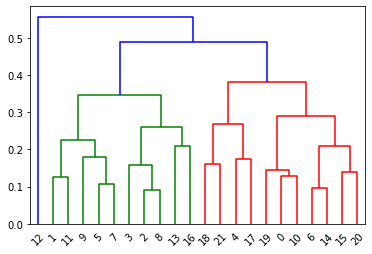

In [44]:
dist_matrix = distance_matrix(dublin_grouped_for_clustering, dublin_grouped_for_clustering) 
# print(dist_matrix)
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

In [45]:
no_of_clusters = 5
agglom = AgglomerativeClustering(n_clusters = no_of_clusters, linkage = 'complete')
agglom.fit(dublin_grouped_for_clustering)
agglom.labels_

array([3, 4, 0, 0, 1, 4, 3, 4, 0, 4, 3, 0, 2, 0, 3, 3, 0, 3, 1, 3, 3, 1])

##### Now, we create a new dataframe that includes the cluster labels, as well as the top 10 venues, for each neighborhood.

In [49]:
# add clustering labels
districts_venues_sorted_for_mr_guinness.insert(0, 'Cluster Labels', agglom.labels_)
districts_venues_sorted_for_mr_guinness.head()

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Dublin 1,Coffee Shop,Café,Pub,Park,Italian Restaurant,Theater,Grocery Store,Supermarket,Gym,Bus Stop
1,4,Dublin 10,Supermarket,Coffee Shop,Convenience Store,Grocery Store,Gym,Park,Café,Pub,Italian Restaurant,Shopping Mall
2,0,Dublin 11,Supermarket,Coffee Shop,Grocery Store,Park,Café,Pub,Chinese Restaurant,Shopping Mall,Convenience Store,Theater
3,0,Dublin 12,Supermarket,Park,Grocery Store,Coffee Shop,Chinese Restaurant,Shopping Mall,Convenience Store,Café,Bus Stop,Light Rail Station
4,1,Dublin 13,Café,Pub,Convenience Store,Grocery Store,Coffee Shop,Bus Stop,Light Rail Station,Italian Restaurant,Chinese Restaurant,Shopping Mall


In [50]:
# merge dublin_grouped with toronto_data to add latitude/longitude for each neighborhood
dublin_merged_for_mr_guinness = dublin_districts
dublin_merged_for_mr_guinness = dublin_merged_for_mr_guinness.join(districts_venues_sorted_for_mr_guinness.set_index('District'), on='District')
dublin_merged_for_mr_guinness.head()

,Postal code,District,Description,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,D1,Dublin 1,Dublin,53.350062,-6.247473,3,Coffee Shop,Café,Pub,Park,Italian Restaurant,Theater,Grocery Store,Supermarket,Gym,Bus Stop
1,D2,Dublin 2,Dublin,53.341753,-6.258112,3,Café,Coffee Shop,Pub,Park,Theater,Italian Restaurant,Chinese Restaurant,Grocery Store,Bus Stop,Light Rail Station
2,D3,Dublin 3,Dublin,53.364304,-6.229960,3,Café,Pub,Italian Restaurant,Coffee Shop,Supermarket,Grocery Store,Park,Bus Stop,Chinese Restaurant,Gym
3,D4,Dublin 4,"Dublin, Dun Laoghaire Rathdown",53.324171,-6.240135,3,Café,Park,Pub,Coffee Shop,Grocery Store,Italian Restaurant,Supermarket,Gym,Bus Stop,Light Rail Station
4,D5,Dublin 5,Dublin,53.385074,-6.161141,0,Supermarket,Gym,Café,Pub,Chinese Restaurant,Shopping Mall,Convenience Store,Grocery Store,Beach,Park


##### Finally, let's visualize the resulting clusters.

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(no_of_clusters)
ys = [i + x + (i*x)**2 for i in range(no_of_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dublin_merged_for_mr_guinness['Latitude'], dublin_merged_for_mr_guinness['Longitude'], dublin_merged_for_mr_guinness['District'], dublin_merged_for_mr_guinness['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

##### Now, we can examine each cluster, determine the venue categories that distinguish one from another, and, based on this, assign a name to each cluster.

### *Cluster 1*

In [52]:
dublin_merged_for_mr_guinness.loc[dublin_merged_for_mr_guinness['Cluster Labels'] == 0, dublin_merged_for_mr_guinness.columns[[1] + list(range(5, dublin_merged_for_mr_guinness.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Dublin 5,0,Supermarket,Gym,Café,Pub,Chinese Restaurant,Shopping Mall,Convenience Store,Grocery Store,Beach,Park
10,Dublin 11,0,Supermarket,Coffee Shop,Grocery Store,Park,Café,Pub,Chinese Restaurant,Shopping Mall,Convenience Store,Theater
13,Dublin 12,0,Supermarket,Park,Grocery Store,Coffee Shop,Chinese Restaurant,Shopping Mall,Convenience Store,Café,Bus Stop,Light Rail Station
16,Dublin 17,0,Supermarket,Coffee Shop,Grocery Store,Park,Chinese Restaurant,Shopping Mall,Convenience Store,Café,Pub,Bus Stop
19,Dublin 20,0,Grocery Store,Supermarket,Coffee Shop,Pub,Park,Bus Stop,Italian Restaurant,Shopping Mall,Convenience Store,Light Rail Station
21,Dublin 24,0,Supermarket,Park,Pub,Light Rail Station,Shopping Mall,Coffee Shop,Bus Stop,Italian Restaurant,Chinese Restaurant,Convenience Store


#### I will name Cluster 1: SUPERMARKETS, grocery stores, parks, coffee shops, and pubs.

### *Cluster 2*

In [53]:
dublin_merged_for_mr_guinness.loc[dublin_merged_for_mr_guinness['Cluster Labels'] == 1, dublin_merged_for_mr_guinness.columns[[1] + list(range(5, dublin_merged_for_mr_guinness.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Dublin 6W,1,Pub,Supermarket,Café,Grocery Store,Italian Restaurant,Gym,Park,Coffee Shop,Bus Stop,Shopping Mall
8,Dublin 9,1,Pub,Café,Bus Stop,Supermarket,Grocery Store,Convenience Store,Gym,Park,Italian Restaurant,Chinese Restaurant
12,Dublin 13,1,Café,Pub,Convenience Store,Grocery Store,Coffee Shop,Bus Stop,Light Rail Station,Italian Restaurant,Chinese Restaurant,Shopping Mall


#### I will name Cluster 2: Pubs, cafés, grocery stores, bus stops and Italian restaurants. 

### *Cluster 3*

In [54]:
dublin_merged_for_mr_guinness.loc[dublin_merged_for_mr_guinness['Cluster Labels'] == 2, dublin_merged_for_mr_guinness.columns[[1] + list(range(5, dublin_merged_for_mr_guinness.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Dublin 22,2,Convenience Store,Bus Stop,Italian Restaurant,Grocery Store,Pub,Light Rail Station,Chinese Restaurant,Shopping Mall,Supermarket,Theater


#### I will name Cluster 3: convenience stores, bus stops, Italian restaurants, grocery stores and pubs.

### *Cluster 4*

In [55]:
dublin_merged_for_mr_guinness.loc[dublin_merged_for_mr_guinness['Cluster Labels'] == 3, dublin_merged_for_mr_guinness.columns[[1] + list(range(5, dublin_merged_for_mr_guinness.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dublin 1,3,Coffee Shop,Café,Pub,Park,Italian Restaurant,Theater,Grocery Store,Supermarket,Gym,Bus Stop
1,Dublin 2,3,Café,Coffee Shop,Pub,Park,Theater,Italian Restaurant,Chinese Restaurant,Grocery Store,Bus Stop,Light Rail Station
2,Dublin 3,3,Café,Pub,Italian Restaurant,Coffee Shop,Supermarket,Grocery Store,Park,Bus Stop,Chinese Restaurant,Gym
3,Dublin 4,3,Café,Park,Pub,Coffee Shop,Grocery Store,Italian Restaurant,Supermarket,Gym,Bus Stop,Light Rail Station
5,Dublin 6,3,Café,Pub,Park,Coffee Shop,Supermarket,Italian Restaurant,Chinese Restaurant,Grocery Store,Gym,Bus Stop
6,Dublin 7,3,Pub,Coffee Shop,Café,Theater,Park,Italian Restaurant,Grocery Store,Supermarket,Bus Stop,Light Rail Station
9,Dublin 8,3,Park,Café,Coffee Shop,Pub,Supermarket,Grocery Store,Italian Restaurant,Chinese Restaurant,Shopping Mall,Convenience Store
14,Dublin 15,3,Café,Pub,Coffee Shop,Supermarket,Park,Italian Restaurant,Grocery Store,Theater,Bus Stop,Light Rail Station


#### I will name Cluster 4: Cafés, coffee shops, pubs, Italian restaurants and parks.

### *Cluster 5*

In [56]:
dublin_merged_for_mr_guinness.loc[dublin_merged_for_mr_guinness['Cluster Labels'] == 4, dublin_merged_for_mr_guinness.columns[[1] + list(range(5, dublin_merged_for_mr_guinness.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Dublin 10,4,Supermarket,Coffee Shop,Convenience Store,Grocery Store,Gym,Park,Café,Pub,Italian Restaurant,Shopping Mall
15,Dublin 14,4,Supermarket,Coffee Shop,Café,Pub,Convenience Store,Italian Restaurant,Shopping Mall,Gym,Park,Light Rail Station
17,Dublin 16,4,Supermarket,Pub,Coffee Shop,Café,Shopping Mall,Park,Italian Restaurant,Gym,Light Rail Station,Theater
18,Dublin 18,4,Pub,Convenience Store,Coffee Shop,Café,Light Rail Station,Shopping Mall,Supermarket,Gym,Park,Bus Stop


#### I will name Cluster 5: Supermarkets, coffee shops, pubs, cafés, gyms and parks.

##### The table below summarize the information presented above:

| cluster | no. of districts   | first              | second              | third               | fourth              | fifth               | sixth               |
|:--------|:-------------------|:-------------------|:--------------------|:--------------------|:--------------------|:-----------------------|:--------------------|
| 1       | 6                  | supermarkets       | parks               | shopping malls      | grocery stores      | coffee shops        | pubs                |
| 2       | 3                  | pubs               | cafés               | grocery stores      | bus stops           | Italian restaurants | supermarkets        |
| 3       | 1                  | convenience stores | bus stops           | Italian restaurants | grocery stores      | pubs                | light rail stations |
| 4       | 8                  | cafés              | coffee shops        | pubs                | Italian restaurants | parks               | grocery stores      |
| 5       | 4                  | supermarkets       | coffee shops        | pubs                | cafés               | gyms                | parks               |